In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [56]:
## BASIC TRANSFORMATION FUNCTION
# SHOW with openCV
def show_img(img):
    cv2.imshow('test', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
# SHOW with matplotlib
def show_image(img, **kwargs):
    """
    Show an RGB numpy array of an image without any interpolation
    """
    
    plt.subplot()
    plt.axis('off')
    plt.imshow(
        X=img,
        interpolation='none',
        **kwargs
    )
    

    
def apply_border(img):
    img = cv2.copyMakeBorder(
    src=img,
    top=10,
    bottom=10,
    left=10,
    right=10,
    borderType=cv2.BORDER_CONSTANT,
    value=(255, 255, 255),)

    h, w, c = img.shape
    print(f'Image shape: {h}H x {w}W x {c}C')
    return img



def resize_img(img, MAX_PIX = 1000):
    """
    Resize an RGB numpy array of an image, either along the height or the width, and keep its aspect ratio. Show restult.
    """
    h, w, c = img.shape
    
    print('w', w, 'MAX_PIX', MAX_PIX)
    
    if h > MAX_PIX:
        flag = 'h'

    if w > MAX_PIX:
        flag = 'w'
    
    
    if flag == 'h':
        dsize = (int((MAX_PIX * w) / h), int(MAX_PIX))
    else:
        dsize = (int(MAX_PIX), int((MAX_PIX * h) / w))

    img_resized = cv2.resize(
        src=img,
        dsize=dsize,
        interpolation=cv2.INTER_CUBIC,
    )

    h, w, c = img_resized.shape
    print(f'Image shape: {h}H x {w}W x {c}C')
    
    show_image(img_resized)

    return img_resized


    if h > MAX_PIX:
        img_resized = resize_image(img, 'h')    

    if w > MAX_PIX:
        img_resized = resize_image(img, 'w')  
        
    return img


def blur_img(img, k_b=5):
    img = cv2.GaussianBlur(
        src=img,
        ksize=(k_b, k_b),
        sigmaX=0,
        sigmaY=0,
    )
    show_img(img)
    return img

def gray_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

Image shape: 2617H x 1695W x 3C
Image shape: 2637H x 1715W x 3C
w 1715 MAX_PIX 1000
Image shape: 1537H x 1000W x 3C


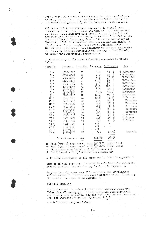

In [57]:
img_o = cv2.imread(
  filename='pdf.jpg',
  flags=cv2.IMREAD_COLOR,
)

h, w, c = img_o.shape
print(f'Image shape: {h}H x {w}W x {c}C')
img = apply_border(img_o)
img= resize_img(img)

In [73]:
img_gray = gray_img(img)
thresh, img_bw = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY)

In [27]:
# def apply_morphology(img, method, k_dim):
#     """
#     Apply a morphological operation, either opening (i.e. erosion followed by dilation) or closing (i.e. dilation followed by erosion). Show result.
#     """
#     kernel = np.ones((k_dim,k_dim), np.uint8)
#     if method == 'open':
#         op = cv2.MORPH_OPEN
#     elif method == 'close':
#         op = cv2.MORPH_CLOSE

#     img_m = cv2.morphologyEx(
#         src=img,
#         op=op,
#         kernel=kernel)
#     show_img(img_m)
# #     return img_m

In [75]:
def morphology_operations(img):
    operation = cv2.MORPH_BLACKHAT
    morph_size = 3
    morph_elem = cv2.MORPH_ELLIPSE

    element = cv2.getStructuringElement(morph_elem, (2*morph_size + 1, 2*morph_size+1), (morph_size, morph_size))
    dst = cv2.morphologyEx(img, operation, element)
    show_img(dst)
    return dst

In [76]:
img_m = morphology_operations(img_bw)

In [77]:

img_m0 = np.invert(img_m)
show_img(img_m0)

In [80]:

def apply_laplacian(img):

    img = cv2.cvtColor(
        src=img,
        code=cv2.COLOR_RGB2GRAY,
    )

    img_laplacian = np.uint8(
        np.absolute(
            cv2.Laplacian(
                src=img,
                ddepth=cv2.CV_64F,
            )
        )
    )

    show_image(img_laplacian, cmap='gray')
    show_img(img)

    return img_laplacian

In [98]:
# dilation
def dilate(img):
    kernel = np.ones((3,3),np.uint8)
    img = cv2.dilate(img, kernel, iterations = 1)
    show_img(img)
    return img
     
# erosion
def erode(img):
    kernel = np.ones((5,5),np.uint8)
    img = cv2.erode(img, kernel, iterations = 1)
    show_img(img)
    return img
 
# opening - erosion followed by dilation
def opening(img):
    kernel = np.ones((3,3),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
 
# canny edge detection
def canny(img):
    img = cv2.Canny(img, 100, 200)
    show_img(img)
    return img
 

In [100]:
img_c = canny(img_m)

In [92]:
img_d0 = dilate(img_m)

In [93]:
erode(img_d0)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
# import sys
# !{sys.executable} -m pip install pytesseract

In [13]:
import pytesseract
from pytesseract import Output

In [14]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [101]:
d = pytesseract.image_to_data(img_m, output_type=Output.DICT)

In [102]:
d

{'level': [1,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  4,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  4,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
 

In [103]:
def detect_text(img):
    d = pytesseract.image_to_data(img, output_type=Output.DICT)

    NbBoites = len(d['level'])
    print ("Nombre de boites: " + str(NbBoites))
    for i in range(NbBoites):
        # Récupère les coordonnées de chaque boite
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Affiche un rectangle
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    show_img(img)

In [106]:
detect_text(img_c)

Nombre de boites: 236


In [107]:
show_img(img_c)